# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel("datasets/all_train_data.xlsx")

In [3]:
train_data

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,train,06/09/2021,01/09/2021,"Best insurance, price, solutions, listening, s...",NaN,NaN
1,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,train,03/05/2021,01/05/2021,"I am generally satisfied, except that you have...",NaN,NaN
2,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,train,21/03/2021,01/03/2021,Very affordable price Several options are avai...,NaN,NaN
3,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,train,10/06/2021,01/06/2021,"I satisfy the service, a very fast response fr...",NaN,NaN
4,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,train,29/01/2017,01/01/2017,"Customer for more than 25 years, very disappoi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23995,4,krys34-96609,J'ai jamais eu de soucis et toujours etait bie...,Assur O'Poil,animaux,train,24/08/2020,01/08/2020,I never had problems and always was well reimb...,NaN,NaN
23996,3,fati-98297,Après 37 ans je quitte la Macif à la suite de ...,MACIF,auto,train,03/10/2020,01/10/2020,After 37 years I leave the Macif following sev...,NaN,NaN
23997,1,jeremy59-96188,Je suis propriétaire d'une flotte de véhicules...,AXA,flotte-automobile,train,11/08/2020,01/08/2020,I own a fleet of motor vehicles which was insu...,NaN,NaN
23998,1,mic-54375,Mutuelle à fuir. Chère. Remboursements insuffi...,Mgen,sante,train,29/04/2017,01/04/2017,Mutual to flee. Dear. Insufficient reimburseme...,NaN,NaN


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   note              24000 non-null  int64  
 1   auteur            23999 non-null  object 
 2   avis              24000 non-null  object 
 3   assureur          24000 non-null  object 
 4   produit           24000 non-null  object 
 5   type              24000 non-null  object 
 6   date_publication  24000 non-null  object 
 7   date_exp          24000 non-null  object 
 8   avis_en           23999 non-null  object 
 9   avis_cor          0 non-null      float64
 10  avis_cor_en       0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.0+ MB


(array([7231.,    0., 3706.,    0.,    0., 3369.,    0., 4860.,    0.,
        4834.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

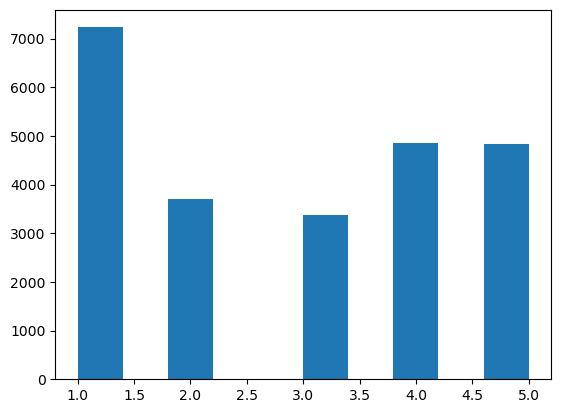

In [5]:
plt.hist(train_data['note'])

In [6]:
list_assureurs= train_data['assureur'].to_numpy()
distinct_assureurs = set(list_assureurs)
len(distinct_assureurs)

56

In [27]:
# df_assureurs = pd.DataFrame(distinct_assureurs) 
    
# # saving the dataframe 
# df_assureurs.to_csv('Liste_assureurs.csv') 


## Word Cloud 

In [30]:
# Load the regular expression library
import re
# Import the wordcloud library
from wordcloud import WordCloud

In [47]:
# Join the different processed titles together.
long_string = ','.join(list(train_data['avis_en'].str))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\julie\AppData\Local\Temp\ipykernel_25168\3291591776.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  long_string = ','.join(list(train_data['avis_en'].str))


KeyboardInterrupt: 

## LDA

In [35]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = train_data.avis_en.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['best', 'insurance', 'price', 'solutions', 'listening', 'speed', 'recommend', 'company', 'attractive', 'prices', 'quality', 'services', 'speed']


In [41]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2)]
[(0, '0.107*"vehicle" + 0.092*"car" + 0.062*"euros" + 0.055*"month" + 0.054*"accident" + 0.036*"also" + 0.036*"responsible" + 0.034*"reimbursed" + 0.033*"guarantees" + 0.031*"offered"'), (1, '0.070*"contract" + 0.040*"time" + 0.037*"year" + 0.037*"since" + 0.029*"even" + 0.027*"make" + 0.026*"one" + 0.025*"call" + 0.024*"made" + 0.022*"care"'), (2, '0.299*"insurer" + 0.250*"disaster" + 0.078*"great" + 0.044*"changed" + 0.042*"incompetence" + 0.031*"door" + 0.028*"came" + 0.023*"mechanic" + 0.021*"consideration" + 0.013*"agents"'), (3, '0.123*"phone" + 0.092*"advisor" + 0.076*"subscription" + 0.073*"contact" + 0.052*"response" + 0.045*"impossible" + 0.038*"management" + 0.037*"contributions" + 0.033*"professional" + 0.027*"answers"'), (4, '0.136*"asked" + 0.069*"subscribe" + 0.065*"signed" + 0.062*"top" + 0.053*"start" + 0.046*"future" + 0.042*"options" + 0.039*"unacceptable" + 0.031*"gest

In [42]:
# Get the 3 most important topics for each document

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

C:\Users\julie\AppData\Local\Temp\ipykernel_25168\1893261979.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\julie\AppData\Local\Temp\ipykernel_25168\1893261979.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [45]:
df_topic_sents_keywords.head(20)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,6,0.3025,"service, satisfied, price, good, customer, pri...","Best insurance, price, solutions, listening, s..."
1,18,0.1557,"insurance, years, without, pay, nothing, take,...","I am generally satisfied, except that you have..."
2,18,0.2269,"insurance, years, without, pay, nothing, take,...",Very affordable price Several options are avai...
3,6,0.1782,"service, satisfied, price, good, customer, pri...","I satisfy the service, a very fast response fr..."
4,1,0.2093,"contract, time, year, since, even, make, one, ...","Customer for more than 25 years, very disappoi..."
5,18,0.1779,"insurance, years, without, pay, nothing, take,...","Forced sale by phone, claiming serious events ..."
6,6,0.2025,"service, satisfied, price, good, customer, pri...",New customer satisfied with the price and serv...
7,0,0.2725,"vehicle, car, euros, month, accident, also, re...",An insurer contacted me by phone to sell me th...
8,8,0.2742,"months, still, file, email, documents, sent, r...",I can only join the many negative opinions. I ...
9,1,0.2311,"contract, time, year, since, even, make, one, ...",Generali Insurance life heritage very bad cust...


In [11]:
df_assureurs = pd.DataFrame(distinct_assureurs) 
    
# saving the dataframe 
df_assureurs.to_csv('datasets/insurers.csv', index=False, header=False)